# DSCI 572 "lecture" 1

Instructor: Mike Gelbart

### Outline of this course:

- **first half** (lectures 1-3): "numerical methods"
- **second half** (lectures 4-7): "deep learning"

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [13]:
plt.rcParams['font.size'] = 16

In [14]:
%autosave 0

Autosave disabled


Topics:

- Gradients "review" (20 min)
- True/False (20 min)
- Break (5 min)
- True/False (20 min)
- Data/parameter space example (5 min)
- Gradient descent: learning rate (10 min)
- Look at lab (5 min - time permitting)
- Pick a block rep (after class)

## Gradients/calculus "review"

#### Ingredient one: functions of multiple variables

- We saw this in DSCI 551 with joint PDFs.
- We can write such a function as $f(x,y,z)$ (for 3 inputs) or $f(x)$ if $x$ is a vector.
- Example: $f(x,y,z) = x^2 + y^2 + e^z + x^z + xyz$.

#### Ingredient two: partial derivatives

- A partial derivative is just a derivative of a multivariable function with respect to one of the input variables.
- When taking this derivative, we treat all the other variables as constants.
  - See [partial derivative slide](partial-deriv.pdf)
- Example: $\frac{\partial}{\partial x} f(x,y,z)$

$$\begin{align}\frac{\partial}{\partial x} \quad &x^2 &+ \quad &y^2 &+ \quad &e^x &+ \quad &x^z &+ \quad &xyz\\=\quad &2x &+ \quad &0 &+\quad  &e^x &+ \quad &zx^{z-1} &+ \quad &yz\end{align}$$

- Important note: $\frac{\partial f}{\partial x} $ is itself a function of $x,y,z$, not just a function of $x$. Think about the picture from the PDF slide above: the slope depends on your position in all coordinates.


#### Ingredient three: gradients

- This is the easy part: a gradient is just a box holding all the $d$ partial derivatives.
 

$$\nabla f(x,y,z)=\begin{bmatrix}\frac{\partial f}{\partial x}\\ \frac{\partial f}{\partial y} \\\frac{\partial f}{\partial z}\end{bmatrix}$$

Or, more generally, if $x$ is a vector then

$$\nabla f(x)=\begin{bmatrix}\frac{\partial f}{\partial x_1}\\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_d}\end{bmatrix}$$

- Thus, a partial derivative is a function that has the same mapping as the original, e.g. $\mathbb{R}^3\rightarrow \mathbb{R}$ ("R three to R").
- a gradient is a function that maps from the original input space to the same space, e.g. $\mathbb{R}^3\rightarrow \mathbb{R}^3$ ("R three to R three").

**Notation warning**: we use the term "derivative" or "gradient" to mean three different things:

1. Operator (written $\frac{d}{dx}$ or $\nabla$), which maps **functions to functions**; "now we take the gradient"
2. Function (written $\frac{df}{dx}$ or $\nabla f$), which maps **vectors to vectors**; "the gradient is $2x+5$"
  - This is what you get after applying the operator to a function
3. Value (written as a number or vector), which is **just a number or vector**; "the gradient is  $\begin{bmatrix}-2.34\\6.43\end{bmatrix}$"
  - This is what you get after applying the function to an input

Since a gradient is a vector, we can talk about its magnitude and direction
  - The magnitude is $\|\nabla f\|$ and tells us **how fast things are changing**.
  - The direction is $\frac{\nabla f}{\|\nabla f \|}$ and tells us **the direction of fastest change** or the steepest direction.

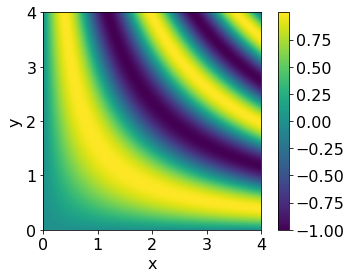

In [15]:
# gradient vector field
f = lambda x,y: np.sin(x*y)

x = np.linspace(0, 4, 1000)
y = np.linspace(0, 4, 1000)
xx, yy = np.meshgrid(x,y)
zz = f(xx,yy)

plt.imshow(zz,extent=(np.min(x), np.max(x), np.min(y), np.max(y)), origin='lower')
plt.xlabel('x');
plt.ylabel('y');
plt.colorbar();

$$\nabla \sin(xy) = \begin{bmatrix} y \cos(xy)\\x\cos(xy)\end{bmatrix}$$

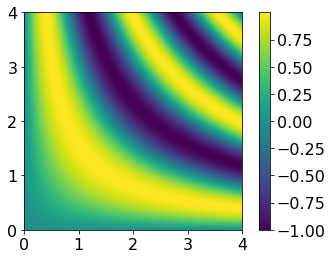

In [16]:
gradf = lambda x,y: (y*np.cos(x*y),x*np.cos(x*y))

xsmall = np.linspace(0, 4, 15)
ysmall = np.linspace(0, 4, 15)
xxsmall, yysmall = np.meshgrid(xsmall,ysmall)
gradx, grady = gradf(xxsmall,yysmall)

plt.imshow(zz,extent=(np.min(x), np.max(x), np.min(y), np.max(y)), origin='lower')
plt.colorbar();

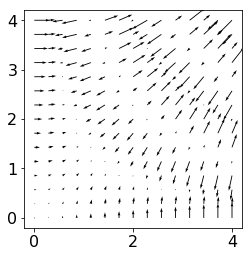

In [17]:
plt.quiver(xxsmall,yysmall,gradx,grady);
plt.axis('square');

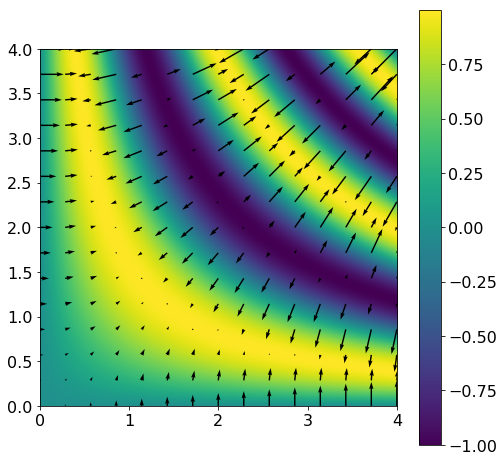

In [18]:
plt.figure(figsize=(8,8))
plt.imshow(zz,extent=(np.min(x), np.max(x), np.min(y), np.max(y)), origin='lower')
plt.colorbar();
plt.quiver(xxsmall,yysmall,gradx,grady);

## True/false questions

Gradients:

1. The gradient of a one-variable function is the same thing as the derivative of the function.
2. If we multiply a function by a constant, its gradient gets multiplied by that constant; in symbols, $\nabla (a \cdot f(x)) = a \,\nabla f(x)$
3. If one element of a gradient is zero, then all the elements must be zero.
4. If the magnitude of the gradient at $x$ is negative, the function is decreasing at $x$.

<br><br><br><br><br><br><br><br><br><br>

(The rest are from the videos.)

Optimization:

1. Most functions can be minimized using pen and paper, by taking the gradient and then setting it to zero.
2. We are mainly interested in optimizing functions that map a vector to a number ($\mathbb{R}^d \rightarrow \mathbb{R}$).
3. Seam carving (DSCI 512 lab 4) was about _discrete_ optimization; on the other hand, least squares (DSCI 561) involves solving a _continuous_ optimization problem.
4. If an objective function is convex, it only has one global minimum.


<br><br><br><br><br><br><br><br><br><br>

-----------------

5-minute break

---------------

Gradient descent:

1. Before starting gradient descent, we don't know how many steps we'll need to reach a desired level of accuracy.
2. To use gradient descent, we need to apply the gradient **operator** once, and the gradient **function** many times.
3. The main disadvantage of setting the learning rate, $\alpha$, too small is that convergence will be very slow.
4. The main disadvantage of setting the learning rate, $\alpha$, too large is that convergence will be very slow.

<br><br><br><br><br><br><br><br><br><br>

Data space and parameter space:

1. In supervised learning, every point in the parameter space corresponds to a regression/classification surface in the data space.
2. In general, dimensionality of the data space $\geq$ dimensionality of the parameter space.
3. Each iteration of gradient descent moves you to a new point in parameter space.
4. The loss function defines a score for each point in data space.
5. In logistic regression, the labels in the data space are discrete but the parameters are continuous. 

<br><br><br><br><br><br><br><br><br><br>

## Data space / parameter space

- In the video, the data space was 2D (1D linear regression) and the parameter space was 2D (slope and intercept).
- This doesn't have to be the case at all. 

Example 1: no intercept term

- Here, the data space is the same as in the video, but the parameter space is only 1D

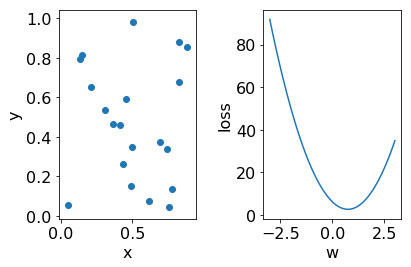

In [19]:
d = 1
n = 20
X = np.random.rand(n,d)
y = np.random.rand(n,1)
plt.subplot(1,2,1)
plt.scatter(X,y);
plt.xlabel('x');
plt.ylabel('y');
w_grid = np.linspace(-3,3,100);
pred = X@w_grid[None]
loss_grid = np.sum((pred-y)**2,axis=0)
plt.subplot(1,2,2)
plt.plot(w_grid, loss_grid);
plt.xlabel('w');
plt.ylabel('loss');
plt.tight_layout();

Example 2: polynomial regression or interaction terms

- Here, we have a coefficient for each term, but the data space stays fixed

## Gradient descent: learning rate demo

- Plots of loss vs. iterations for different learning rates

In [21]:
np.random.seed(0)

d = 10
n = 1000
X = np.random.randn(n,d) * 0.01 # making this smaller means the learning rate you need is larger; making this larger causes training to diverge
y = X @ np.random.randn(d,1)

# functions to compute the loss and gradient
f = lambda w: np.sum((X@w-y)**2)/2
df= lambda w: X.T@(X@w) - X.T@y

def make_alpha_plots(alpha_vals):
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    loss = dict()
    for alpha in alpha_vals:
        w = np.zeros((d,1)) # initialize parameters
        grad_f = df(w)
        loss[alpha] = [f(w)]
        while np.linalg.norm(grad_f) > 0.001:
            grad_f = X.T@(X@w) - X.T@y
            w -= alpha*grad_f
            loss[alpha].append(f(w))
            if loss[alpha][-1] > loss[alpha][0]:
                break

        plt.plot(loss[alpha], label="alpha = %s"%alpha)
    plt.legend();
    plt.xlabel("iterations");
    plt.ylabel("loss");
    plt.title("Loss vs. iterations for different learning rates");
    
    plt.subplot(2,1,2)
    plt.plot(alpha_vals, [len(loss[alpha]) if loss[alpha][-1]<loss[alpha][0] else 1000 for alpha in alpha_vals]);
    plt.xlabel("alpha");
    plt.ylabel("iterations");
    plt.title("Iterations until convergence");
    
    plt.tight_layout()


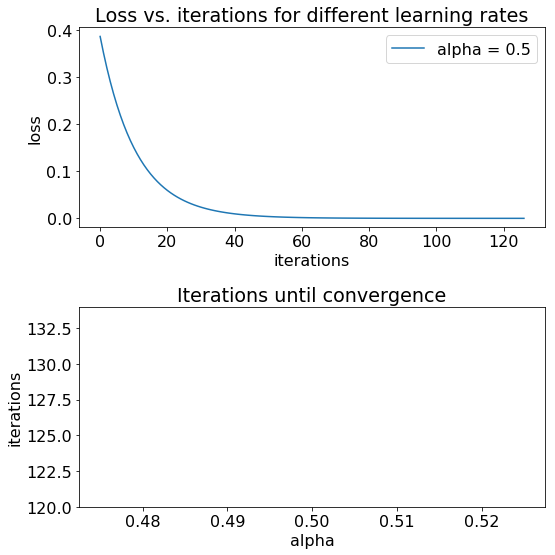

In [22]:
make_alpha_plots(2.0**np.arange(-1,0))

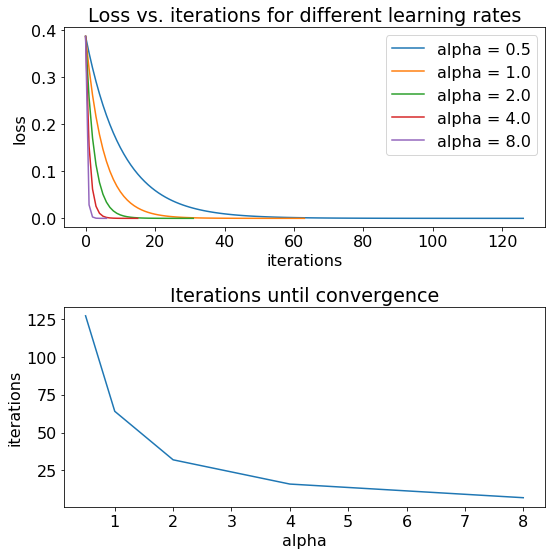

In [23]:
make_alpha_plots(2.0**np.arange(-1,4))

Above: it seems larger `alpha` leads to faster convergence. But the plot thickens...

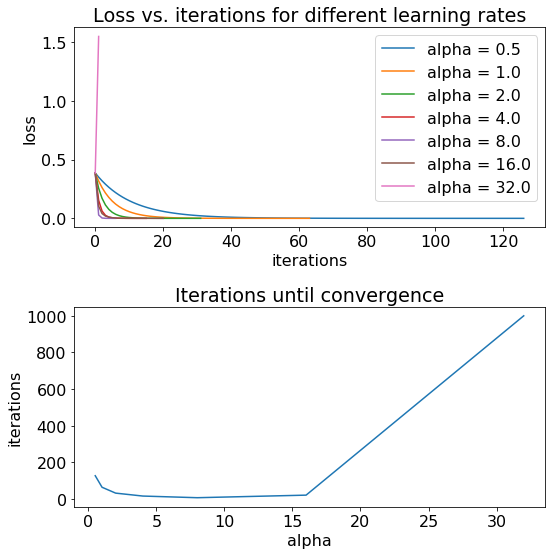

In [24]:
make_alpha_plots(2.0**np.arange(-1,6))

(Optional) And an interesting case:

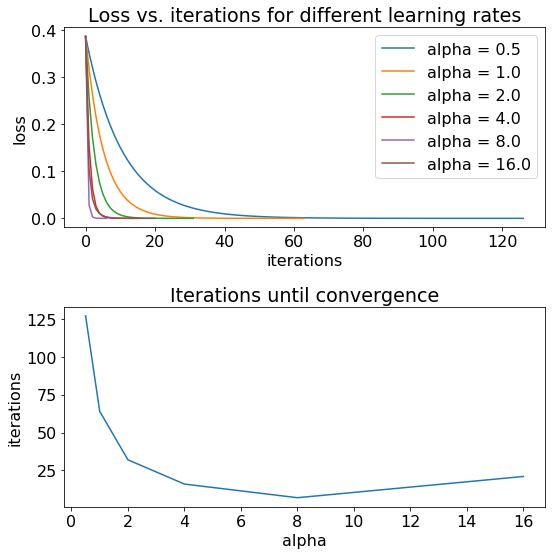

In [25]:
make_alpha_plots(2.0**np.arange(-1,5))

(Optional) Above: although training does not diverge when $\alpha=16$, it is slower than $\alpha=8$. This is presumably due to "bouncing around" in parameter space.

## Look at lab (5 min)

## Choose Block 4 rep (after class)